# CMP22, CGR4 and KT-19

The following example demonstrates the use of broadband irradiance data collected during ACLOUD and AFLUX. The dataset includes solar and terrestrial broadband irradiance and nadir brightness temperature. The full dataset is available on PANGAEA for ACLOUD and AFLUX.

## Broadband irradiance (CMP 22 pyranometer and CGR4 pyrgeometer)

Upward and downward broadband irradiances are measured by pairs of CMP 22 pyranometers and CGR4 pyrgeometers, covering the solar (0.2–3.6 µm) and thermal-infrared (4.5–42 µm) wavelength range, respectively. Data is sampled with a frequency of 20 Hz. In stationary operation, the uncertainty of the sensors is less than 3 %.

## Nadir Brightness Temperature (KT-19)

Surface brightness temperature was measured by a nadir-looking Kelvin infrared radiation Thermometer (KT-19). These measurements were converted into surface temperature values assuming an emissivity of 1. This is justified due to the small impact of atmospheric absorption in the wavelength range of 9.6 to 11.5 µm for which the KT-19 is sensitive. With a sampling frequency of 20 Hz, the KT-19 resolves small scales of the surface temperature heterogeneities, such as observed in the case of leads in sea ice.

More information about the dataset is found in **[Ehrlich et al. 2019](https://essd.copernicus.org/articles/11/1853/2019/).**

## Data access

To load the data we first load the (AC)³airborne meta data catalogue. More information on the catalog can be found [here](https://github.com/igmk/ac3airborne-intake#ac3airborne-intake-catalogue).

In [1]:
import ac3airborne

We first want to list the available research flights:

In [2]:
cat = ac3airborne.get_intake_catalog()
list(cat.P5.BROADBAND_IRRADIANCE)

['ACLOUD_P5_RF04',
 'ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF08',
 'ACLOUD_P5_RF10',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF13',
 'ACLOUD_P5_RF14',
 'ACLOUD_P5_RF15',
 'ACLOUD_P5_RF16',
 'ACLOUD_P5_RF17',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22',
 'ACLOUD_P5_RF23',
 'ACLOUD_P5_RF25',
 'AFLUX_P5_RF02',
 'AFLUX_P5_RF03',
 'AFLUX_P5_RF04',
 'AFLUX_P5_RF05',
 'AFLUX_P5_RF06',
 'AFLUX_P5_RF07',
 'AFLUX_P5_RF08',
 'AFLUX_P5_RF09',
 'AFLUX_P5_RF10',
 'AFLUX_P5_RF11',
 'AFLUX_P5_RF12',
 'AFLUX_P5_RF13',
 'AFLUX_P5_RF14',
 'AFLUX_P5_RF15']

Then we choose to load the Broadband Irradiance dataset of a specific flight. In this case we will look at the data of the *research fligth n°3* of the *AFLUX* campaign.

```{note}
Have a look at the attributes of the xarray dataset `ds_broad_irr` for all relevant information on the dataset, such as author, contact, or citation infromation.
```

In [3]:
ds_broad_irr = cat['P5']['BROADBAND_IRRADIANCE']['AFLUX_P5_RF03'].to_dask()
ds_broad_irr

<xarray.Dataset>
Dimensions:            (Time: 334437)
Dimensions without coordinates: Time
Data variables: (12/14)
    time               (Time) datetime64[ns] ...
    Lon                (Time) float32 ...
    Lat                (Time) float32 ...
    Alt                (Time) float32 ...
    Solar_F_dw         (Time) float32 ...
    Solar_F_up         (Time) float32 ...
    ...                 ...
    KT19               (Time) float32 ...
    Attitude_Flag      (Time) int8 ...
    Amb_T_Flag         (Time) int8 ...
    Airc_Stab_flag     (Time) int8 ...
    Pyrano_Icing_Flag  (Time) int8 ...
    Pyrgeo_Icing_Flag  (Time) int8 ...
Attributes:
    description:  ############################### \n             General Info...

The dataset includes downward and upward, solar and terrestrial irradiance(`Solar_F_dw`, `Solar_F_up`, `Terr_F_dw` and `Terr_F_up`) and IR Brightness Temperature in nadir direction (`KT19`). There are also quality flags where data must be interpreted with care or discarded.

```{note}
Please check the attributes of the xarray dataset `ds_broad_irr` for the meaning of the data flags.
```

The full dataset is available on PANGAEA.

For some reason, the time variable is not set as a coordinate in the dataset, so we should set it.

In [4]:
ds_broad_irr = ds_broad_irr.assign_coords({"Time": ("Time", ds_broad_irr.time.data)})
ds_broad_irr

<xarray.Dataset>
Dimensions:            (Time: 334437)
Coordinates:
  * Time               (Time) datetime64[ns] 2019-03-21T09:52:10.050781250 .....
Data variables: (12/14)
    time               (Time) datetime64[ns] 2019-03-21T09:52:10.050781250 .....
    Lon                (Time) float32 ...
    Lat                (Time) float32 ...
    Alt                (Time) float32 ...
    Solar_F_dw         (Time) float32 ...
    Solar_F_up         (Time) float32 ...
    ...                 ...
    KT19               (Time) float32 ...
    Attitude_Flag      (Time) int8 ...
    Amb_T_Flag         (Time) int8 ...
    Airc_Stab_flag     (Time) int8 ...
    Pyrano_Icing_Flag  (Time) int8 ...
    Pyrgeo_Icing_Flag  (Time) int8 ...
Attributes:
    description:  ############################### \n             General Info...

## Load Polar 5 flight phase information¶

Polar 5 flights are divided into segments to easily access start and end times of flight patterns. For more information have a look at the respective github repository.

At first we want to load the flight segments of (AC)³airborne.

In [5]:
meta = ac3airborne.get_flight_segments()

In this example we want to look at `AFLUX_P5_RF03`.

In [6]:
flight = meta['P5']['AFLUX_P5_RF03']

We do not want to look into the data of the whole flight. Instead we want to select a specific portion of the flight, for example a `high_level` leg. In order to simplify things we can import the module `flightphase` from the `ac3airborne.tools`.

In [7]:
from ac3airborne.tools import flightphase as fp

We can now select only the `high_level` legs und show a list of the available legs of this kind.

In [8]:
flight_query = fp.FlightPhaseFile(flight)

queried = flight_query.selectKind(['high_level'])
queried

[{'dropsondes': [],
  'end': datetime.datetime(2019, 3, 21, 10, 44, 51),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9500],
  'name': 'high level 1',
  'segment_id': 'AFLUX_P5_RF03_hl01',
  'start': datetime.datetime(2019, 3, 21, 10, 5, 48)},
 {'dropsondes': [],
  'end': datetime.datetime(2019, 3, 21, 12, 53, 41),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9500],
  'name': 'high level 2',
  'segment_id': 'AFLUX_P5_RF03_hl02',
  'start': datetime.datetime(2019, 3, 21, 12, 44, 57)},
 {'dropsondes': [],
  'end': datetime.datetime(2019, 3, 21, 14, 6, 37),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9500],
  'name': 'high level 3',
  'segment_id': 'AFLUX_P5_RF03_hl03',
  'start': datetime.datetime(2019, 3, 21, 13, 35, 32)}]

We decide to select a specific element of the array:

In [9]:
queried[1]

{'dropsondes': [],
 'end': datetime.datetime(2019, 3, 21, 12, 53, 41),
 'irregularities': [],
 'kinds': ['high_level'],
 'levels': [9500],
 'name': 'high level 2',
 'segment_id': 'AFLUX_P5_RF03_hl02',
 'start': datetime.datetime(2019, 3, 21, 12, 44, 57)}

We will use later the start and end time in order to select the data that we want to analyze.

In [10]:
start = queried[1]['start']
end   = queried[1]['end']

## Read the GPS information

We now want to read the GPS information, because we want to locate the flight segment and visualize it in a plot:

In [11]:
cat2 = ac3airborne.get_intake_catalog()
ds_gps = cat2['P5']['GPS_INS']['AFLUX_P5_RF03'].to_dask()
ds_gps

<xarray.Dataset>
Dimensions:  (time: 18037)
Coordinates:
  * time     (time) datetime64[ns] 2019-03-21T09:36:00 ... 2019-03-21T14:37:00
Data variables:
    alt      (time) float64 ...
    tas      (time) float64 ...
    lat      (time) float64 ...
    lat_dir  (time) object ...
    lon      (time) float64 ...
    lon_dir  (time) object ...
    vs       (time) float64 ...
    gs       (time) float64 ...
    pitch    (time) float64 ...
    roll     (time) float64 ...
    heading  (time) float64 ...
Attributes: (12/14)
    description:  1Hz subset based on GPS1 and INS data processed by AWI engi...
    instruments:  GPS1 and INS
    version:      [0.1]
    contact:      mario.mech@uni-koeln.de, martin.gehrmann@awi.de
    institution:  ['Alfred-Wegener-Institut Helmholtz-Zentrum für Polar- und ...
    author:       Dr. Mario Mech
    ...           ...
    featureType:  trajectory
    mission:      AFLUX
    platform:     Polar5
    flight_id:    RF03
    title:        Polar5 position and attitude data
    history:      acquired by Polar5 during AFLUX campaign, quality checked b...

## Plot the flight segment

Now we can plot both the whole flight and the flight segment, so that we can show where the measurments have taken place before we plot them.

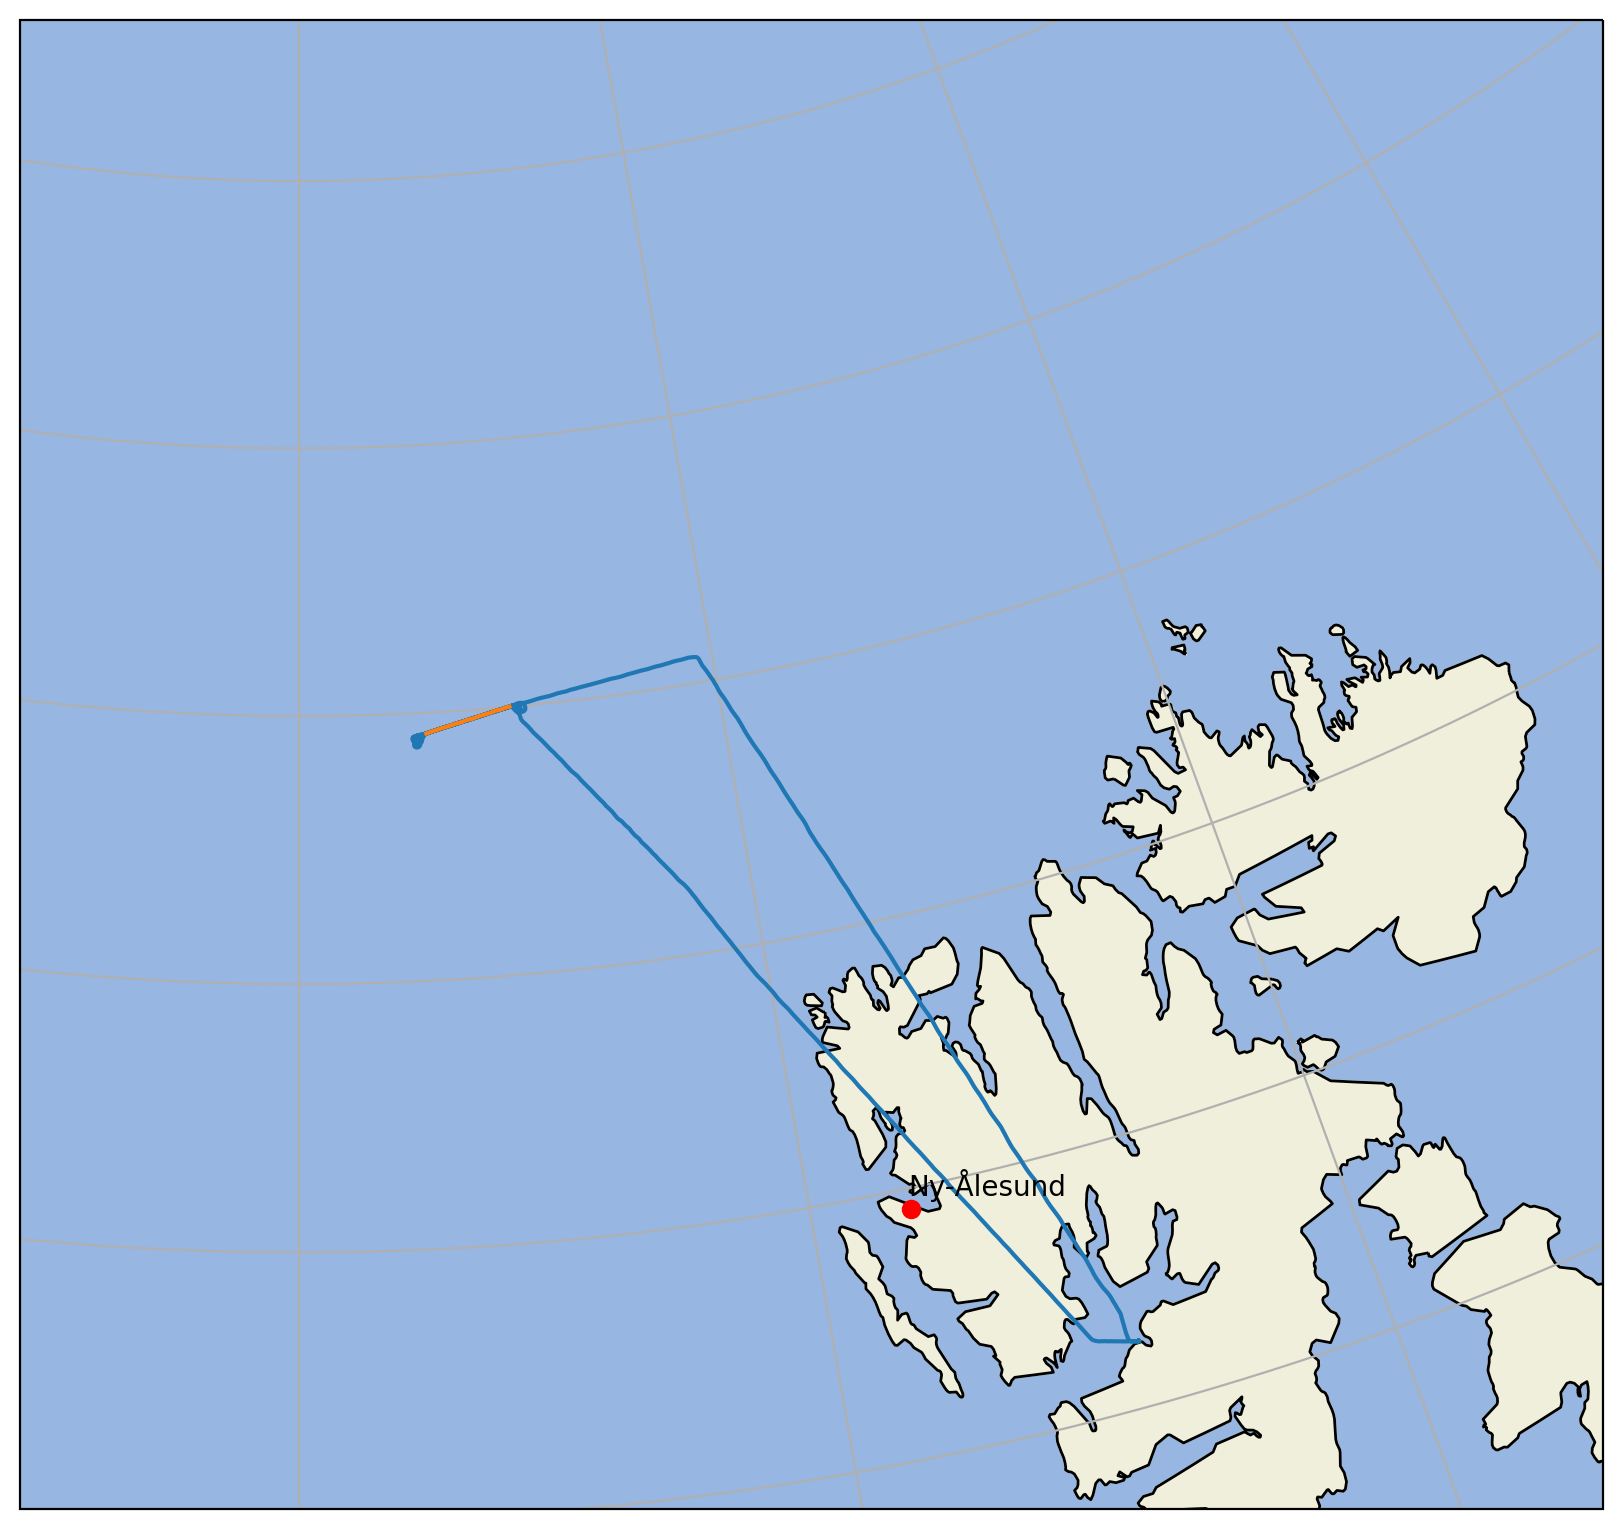

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.style.use("../mplstyle/book")

proj = ccrs.NorthPolarStereo()
extent = (-5.0, 24.0, 78.0, 83.0)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=proj)
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.gridlines()
ax.coastlines()

nya_lat = 78.924444
nya_lon = 11.928611

ax.plot(nya_lon, nya_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(nya_lon, nya_lat+0.05, 'Ny-Ålesund', transform=ccrs.PlateCarree())

line_all = ax.plot(ds_gps.lon, ds_gps.lat, transform=ccrs.PlateCarree())

line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
               ds_gps.lat.sel(time=slice(start, end)),
               transform=ccrs.PlateCarree())

plt.show()


## Plot the data

We can now select the data and plot it.

In [14]:
time_of_segment = ds_broad_irr.time.sel(Time = slice(start, end))

Solar_F_dw = ds_broad_irr.Solar_F_dw.sel(Time = slice(start, end))
Solar_F_up = ds_broad_irr.Solar_F_up.sel(Time = slice(start, end))
Terr_F_dw  = ds_broad_irr.Terr_F_dw.sel(Time = slice(start, end))
Terr_F_up  = ds_broad_irr.Terr_F_up.sel(Time = slice(start, end))
KT19       = ds_broad_irr.KT19.sel(Time = slice(start, end))

We want to add also some information about ice coverage:

In [15]:
ds_sea_ice = cat['P5']['AMSR2_SIC']['AFLUX_P5_RF03'].to_dask().sel(time = slice(start, end))

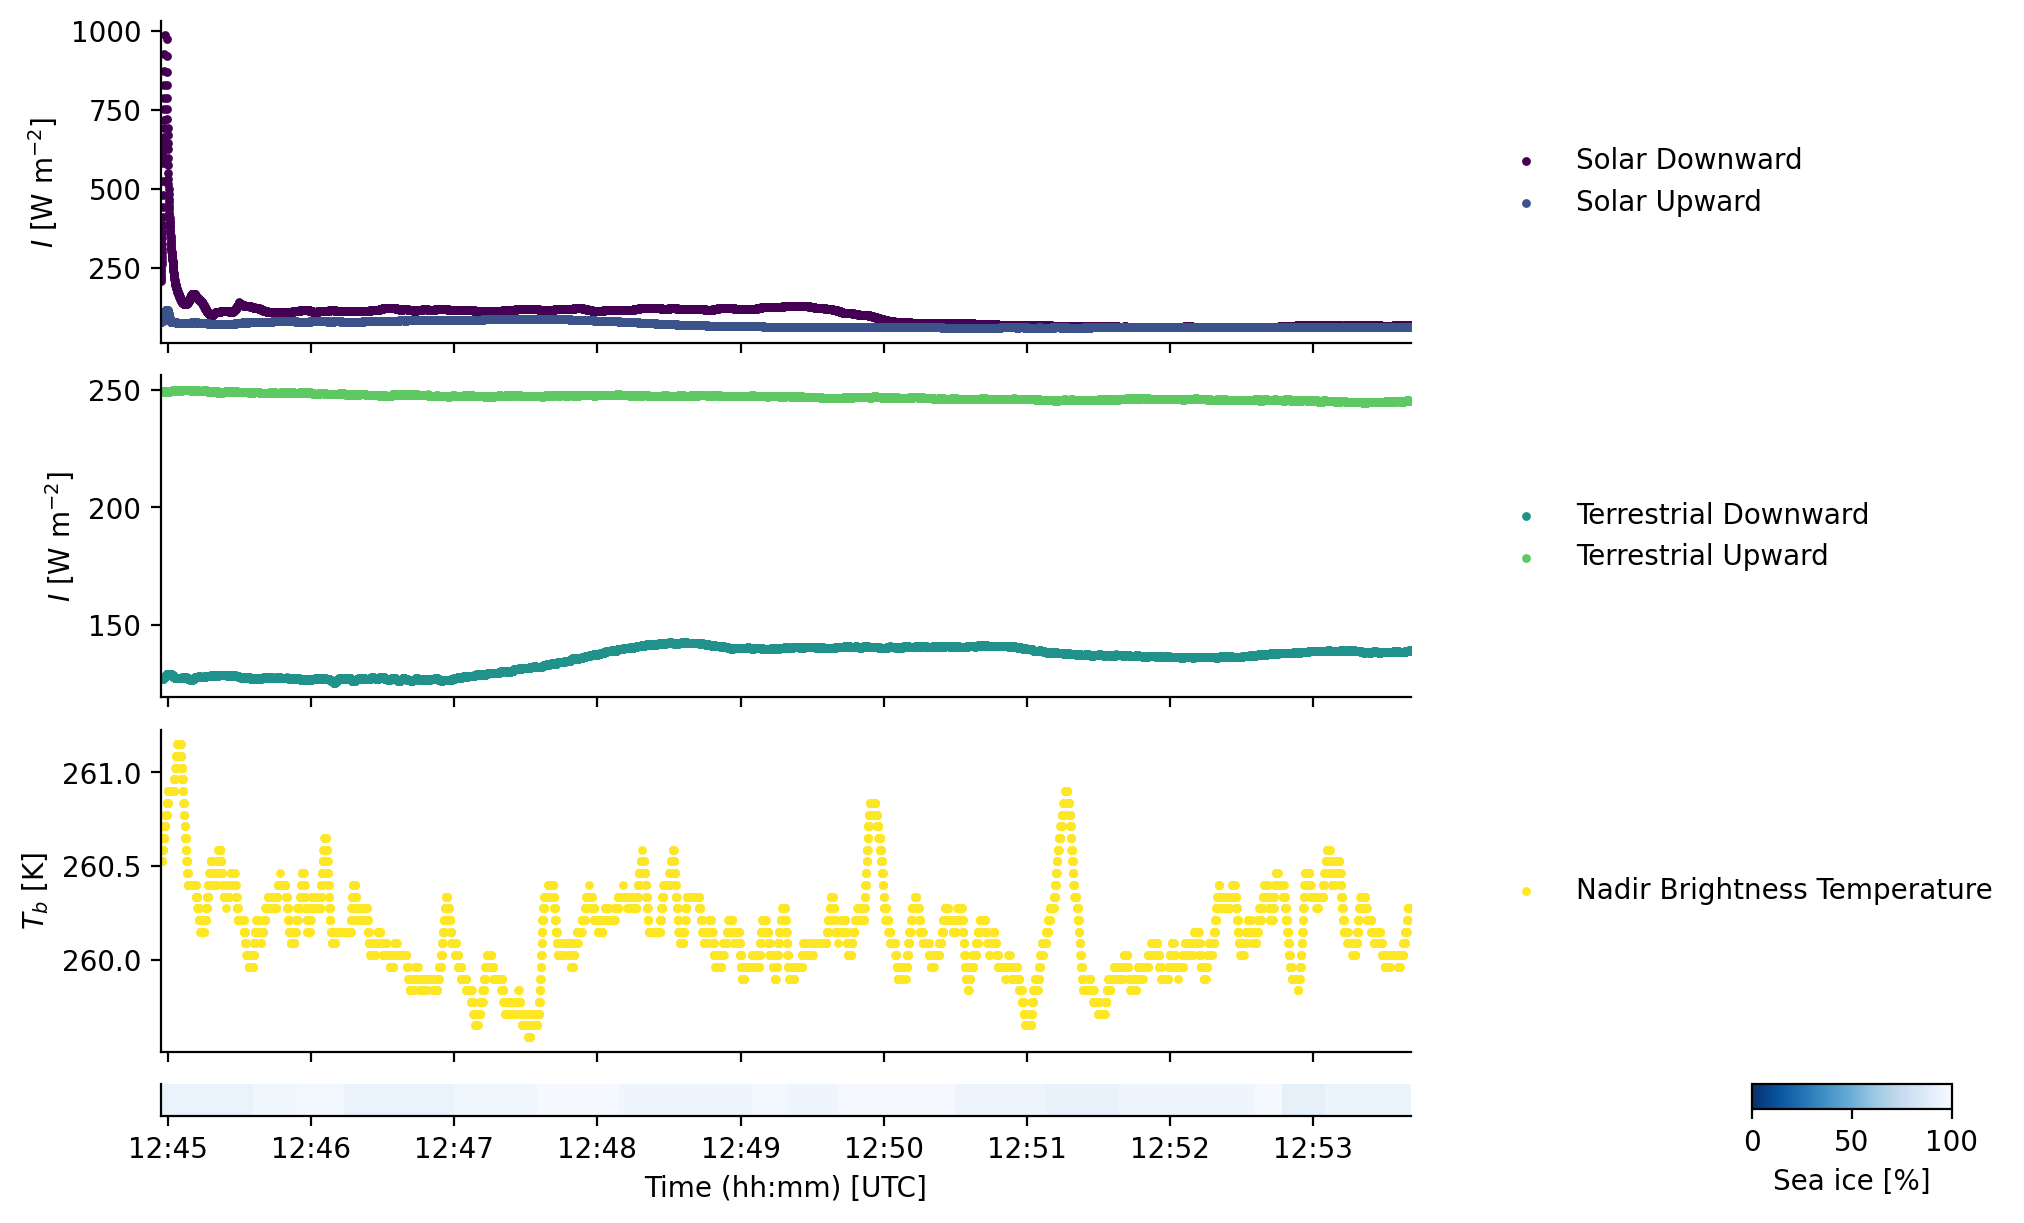

In [16]:
import matplotlib.dates as mdates
from matplotlib import cm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, gridspec_kw=dict(height_ratios=(1, 1, 1, 0.1)))

kwargs = dict(s=10, linewidths=0)
colors = cm.get_cmap('viridis', 5).colors

ax1.scatter(time_of_segment, Solar_F_dw, label='Solar Downward', color=colors[0], **kwargs)
ax1.scatter(time_of_segment, Solar_F_up, label='Solar Upward', color=colors[1], **kwargs)

ax2.scatter(time_of_segment, Terr_F_dw, label='Terrestrial Downward', color=colors[2], **kwargs)
ax2.scatter(time_of_segment, Terr_F_up, label='Terrestrial Upward', color=colors[3], **kwargs)

ax3.scatter(time_of_segment, KT19, label='Nadir Brightness Temperature', color=colors[4], **kwargs)

ax1.legend(frameon=False, bbox_to_anchor=(1.05, 0.5), loc='center left')
ax2.legend(frameon=False, bbox_to_anchor=(1.05, 0.5), loc='center left')
ax3.legend(frameon=False, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax1.set_ylabel('$I$ [W m$^{-2}$]')
ax2.set_ylabel('$I$ [W m$^{-2}$]')
ax3.set_ylabel('$T_b$ [K]')

# plot AMSR2 sea ice concentration
im = ax4.pcolormesh(np.array([ds_sea_ice.time, ds_sea_ice.time]),
               np.array([0, 1]),
               np.array([ds_sea_ice.sic]), cmap='Blues_r', vmin=0, vmax=100,
               shading='auto')
cax = fig.add_axes([0.87, 0.085, 0.1, ax4.get_position().height])
fig.colorbar(im, cax=cax, orientation='horizontal', label='Sea ice [%]')
ax4.tick_params(axis='y', labelleft=False, left=False)

ax4.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax4.set_xlabel('Time (hh:mm) [UTC]')

plt.show()